# Do not change imports!

In [2]:
import numpy as np

import sympy as sp
sp.init_printing()

# A. Solve 2x2 for Eigenvalues/Eigenvectors
1. By hand, algebraically produce the characteristic equation of the matrix
2. Use SymPi to solve for the eigenvalues
3. Store the eigenvalues
4. By hand, algebraically produce the relationship between eigenvector components
5. Use SymPi to solve for the corresponding eigenvector spans
6. Compare to NumPy

In [3]:
# Do not change!
A2 = [[12, 3], [3, 4]]

## A.1. Characteristic Equation
$$ A \vec{v} = \lambda \vec{v} $$
$$ 0 = \lambda \vec{v} - A \vec{v} $$
$$ 0 = \lambda \mathcal{I} \vec{v} - A \vec{v} $$
$$ 0 = (\lambda \mathcal{I} - A) \vec{v} $$
$$ \det ( \lambda \mathcal{I} - A ) = 0 $$

$$ \det( \begin{matrix} 
\lambda - 12 & -3 \\
-3 & \lambda - 4 
\end{matrix} ) = 0 $$

TODO: finish (produce a polynomial in $\lambda$ equal to 0, showing all steps)

**Solution**
$$ (\lambda - 12)(\lambda - 4) - 9 = 0 $$
$$ \lambda^2 - 16\lambda +39 = 0 $$



## A.2 Eigenvalues via Symbolic Computation

In [6]:
# intentional misspelling, required
l = sp.symbols('lambda')

In [8]:
# TODO: use SymPy's solveset function to solve the equation you've found by hand
sp.solve(l**2 - 16*l + 39, l)

### Or purely via SymPy ...

In [13]:
A2m = sp.Matrix(A2)

# TODO: replace assignment using SymPy's charpoly function to reproduce the equation you derived above
expr = A2m.charpoly(l)

# print
expr

In [14]:
# expression factored
expr.factor()

In [15]:
# eigenvalues!
A2m.eigenvals()

## A.3 Store Eigenvalues
TODO: overwrite assignments (1=bigger, 2=smaller)

In [26]:
l1 = 13
l2 = 3

## A.4 Eigenvectors by Hand
One way to do it...

$$ A \vec{v} = \lambda \vec{v} $$
$$ \begin{pmatrix} 
12 & 3 \\
3 & 4 
\end{pmatrix} \begin{pmatrix}
x \\
y
\end{pmatrix} =
\lambda 
\begin{pmatrix}
x \\
y
\end{pmatrix}
$$

$$ 12x + 3y = \lambda x $$
$$ 3x + 4y = \lambda y $$

### Eigenvector 1

TODO: plug in first eigenvalue, solve

**Solution**

Consider the first equation
$$
\begin{align*}
    12x + 3y &= 13x
    y &= \frac{x}{3}
\end{align*}
$$
Solving the second equation gives the same result


### Eigenvector 2

TODO: repeat for eigenvalue 2

**Solution**

Consider the first equation
$$
\begin{align*}
    12x + 3y &= 3x
    y &= -3x
\end{align*}
$$
Solving the second equation gives the same result

## A.5 Eigenvectors via Symbolic Computation

In [25]:
x = sp.Symbol('x')
y = sp.Symbol('y')

eqn1 = 12*x + 3*y - l*x
eqn2 = 3*x + 4*y - l*y
eqn1

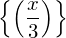

In [21]:
# first eigenvector
eqns1 = [eqn1.subs(l, l1), eqn2.subs(l, l1)]
sp.linsolve(eqns1, y)

In [29]:
# TODO: repeat for second
eqns2 = [eqn1.subs(l, l2), eqn1.subs(l, l2)]
sp.linsolve(eqns2, y)

### Or purely via SymPy ...

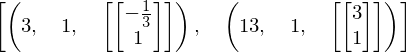

In [30]:
A2m.eigenvects()

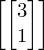

In [33]:
# Or...
(l1*sp.eye(2) - A2m).nullspace()

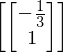

In [34]:
(l2*sp.eye(2) - A2m).nullspace()

TODO: Why did nullspace() return the eigenvectors?

**Solution**
The nullspace of a linear transformation/matrix is a set of vectors that become $0$ after the transformation.

As shown in A.1, vector $v$ is an eigenvector only if the below equation is satisfied
$$ 0 = (\lambda \mathcal{I} - A) \vec{v} $$
For this equation to hold non-trivially, $ \det ( \lambda \mathcal{I} - A ) = 0 $, which implies that every eigenvector lies in the nullspace of $(\lambda \mathcal{I} - A)$

## A.6 Numerical Computation via NumPy

In [35]:
np.linalg.eigh(A2)

(array([  3.,  13.]), array([[ 0.31622777, -0.9486833 ],
        [-0.9486833 , -0.31622777]]))

TODO: discuss the difference between outcomes, and when you might use one approach over another

# B. Solve 3x3 for Eigenvalues/Eigenvectors
1. By hand, algebraically produce the characteristic equation of the matrix
2. Use SymPi to solve for the eigenvalues
3. Store the eigenvalues
4. By hand, algebraically produce the relationship between eigenvector components
5. Use SymPi to solve for the corresponding eigenvector spans
6. Compute with NumPy

In [37]:
# Do not change!
A3 = [[-1, 2, 2], [2, 2, -1], [2, -1, 2]]

## B.1. Characteristic Equation
$$ A \vec{v} = \lambda \vec{v} $$

TODO: finish (polynomial in $\lambda$ equal to 0)

**Solution**

$$
\det ( \lambda \mathcal{I} - A ) = 0 
$$

$$ 
\det( 
\begin{matrix} 
    \lambda + 1 & -2 & -2 \\
    -2 & \lambda - 2 & 1 \\
    -2 & 1 & \lambda - 2
\end{matrix} 
) = 0 
$$

$$
\begin{align*}
    (\lambda + 1)((\lambda - 2)^2  - 1) + 2(-2(\lambda - 2) + 2) - 2(-2 - (-2)(\lambda - 2)) &= 0 \\
    (\lambda + 1)(\lambda - 2)^2 - \lambda - 1 + 2(-2\lambda + 6) - 2(2\lambda - 6) &= 0 \\
    (\lambda + 1)(\lambda - 2)^2 - 9\lambda + 23 &= 0 \\
    (\lambda^3 - 3\lambda^2 - 9\lambda + 27) &= 0
\end{align*}
$$

## B.2 Eigenvalues via Symbolic Computation

In [53]:
# TODO: use SymPy's solveset function to solve the equation you've found symbolically
sp.solve((l + 1)*(l - 2)**2 - 9*l + 23, l)

### Or purely via SymPy ...

In [54]:
A3m = sp.Matrix(A3)

# TODO: use SymPy's charpoly function to produce the equation you derived above
expr = A3m.charpoly(l)

# print
expr

In [55]:
expr.factor()

In [56]:
A3m.eigenvals()

## B.3 Store Eigenvalues
TODO: overwrite assignments (1=bigger, 2=smaller)

In [57]:
l1 = 3
l2 = -3

## B.4 Eigenvectors by Hand
Doing things slightly differently (works either way)...

$$ \begin{pmatrix} 
\lambda +1 & -2 & -2 \\
-2 & \lambda - 2 & 1 \\
-2 & 1 & \lambda - 2
\end{pmatrix} \vec{v} = 0 $$

### Eigenvector 1

$$ \begin{pmatrix} 
4 & -2 & -2 \\
-2 & 1 & 1 \\
-2 & 1 & 1
\end{pmatrix} \vec{v} = 0 $$

RREF: 
* ([2] and [3] * 2 + [1])

$$ \begin{pmatrix} 
4 & -2 & -2 \\
0 & 0 & 0 \\
0 & 0 & 0
\end{pmatrix} \begin{pmatrix} 
x \\
y \\
z
\end{pmatrix} = 0 $$

$$ 4x - 2y - 2z = 0 $$
$$ x = \frac{y}{2} + \frac{z}{2} $$

### Eigenvector 2

TODO: repeat for eigenvalue 2

## B.5 Eigenvectors via Symbolic Computation

In [58]:
z = sp.Symbol('z')

b = sp.zeros(3,1)
b

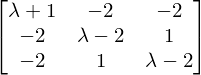

In [59]:
A3l = l*sp.eye(3) - A3m
A3l

### First Eigenvector

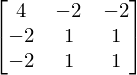

In [60]:
A3l.subs(l, l1)

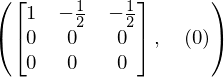

In [61]:
A3l.subs(l, l1).rref()

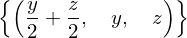

In [62]:
sp.linsolve((A3l.subs(l, l1), b), [x, y, z])

### Second Eigenvector

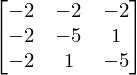

In [63]:
# TODO: repeat substitution for second eigenvalue
A3l.subs(l, l2)

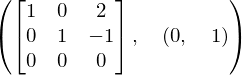

In [64]:
# TODO: repeat RREF for second eigenvalue
A3l.subs(l, l2).rref()

In [65]:
# TODO: repeat linear solve for second eigenvalue
sp.linsolve((A3l.subs(l, l2), b), [x, y, z])

## B.6 Numerical Computation via NumPy

In [66]:
np.linalg.eigh(A3)

(array([-3.,  3.,  3.]), array([[-0.81649658,  0.        , -0.57735027],
        [ 0.40824829, -0.70710678, -0.57735027],
        [ 0.40824829,  0.70710678, -0.57735027]]))